# Лабораторная работа №4. Исследование нейронных сетей с радиальными базисными функциями (RBF) на примере моделирования булевых выражений

### Импортируем необходимые модули

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
def simulated_boolean_function(x1, x2, x3, x4):
    return int((not (x1 or x2)) or x3 or x4)

In [3]:
X1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
X2 = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
X3 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
X4 = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [4]:
Y = np.array([simulated_boolean_function(X1[i], X2[i], X3[i], X4[i]) for i in range(16)])

In [5]:
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [6]:
X_test = [[X1[i], X2[i], X3[i], X4[i]] for i in range(16)]

In [7]:
C = np.array([[0, 1, 0, 0],
             [1, 0, 0, 0],
             [1, 1, 0, 0]])

In [8]:
EPOCH_NUMBER = 5
BIG_EPOCH_NUMBER = 120
lr = 0.3

In [9]:
def loss(y_true, y_predicted):
    return y_true - y_predicted

In [10]:
def get_predict(net, X_test):
    y_predicted = []
    y_predicted = [net.forward(x) for x in X_test]
    return np.array(y_predicted)

## Binary step

In [11]:
class RadialBasisFunctionNeuron:
    def __init__(self, center):
        self.center = center
    
    def get_phi(self, X):
        summary = np.sum((X - self.center) ** 2)
        return exp(-summary)

In [12]:
class BinaryStepNet:
    
    def __init__(self, neurons_count, centers):
        self.neurons_count = neurons_count
        self.neuron = []
        for i in range(self.neurons_count):
            self.neuron.append(RadialBasisFunctionNeuron(centers[i]))
        self.W = np.zeros(shape=neurons_count)
        self.b = 0
    
    def forward(self, x):
        self.phi = []
        for i in range(self.neurons_count):
            self.phi.append(self.neuron[i].get_phi(x))
        self.phi = np.array(self.phi)
        self.net = np.dot(self.W, self.phi) + self.b
        self.binary_step = int(self.net >= 0)
        return self.binary_step
    
    def backward(self, delta, lr=0.3):
        self.dW = np.dot(lr * delta, self.phi)
        self.db = lr * delta
        self.W = self.W + self.dW
        self.b = self.b + self.db

### Пробуем обучиться на всех данных


	Epoch  0
W =  [-0.17470005 -0.27012776 -0.28856208] b =  0.3
Y_pred =  [1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1]
Y_true =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  7.0

	Epoch  1
W =  [-0.17470005 -0.27012776 -0.28856208] b =  0.3
Y_pred =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
Y_true =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  0.0


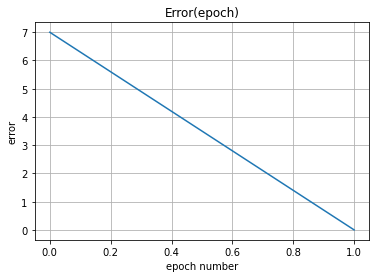

In [13]:
net = BinaryStepNet(3, C)
L_iter = []
size_of_train = 16

for epoch in range(EPOCH_NUMBER):
    error = 0.
    print("\n\tEpoch ", epoch)
    Y_predicted = []
    for i in range(size_of_train):
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error += np.abs(delta)
        net.backward(delta, lr)
        Y_predicted.append(y_predicted)
    L_iter.append(error)
    print("W = ", net.W, 'b = ', net.b)
    print("Y_pred = ", np.array(Y_predicted))
    print("Y_true = ", Y)
    print("E = ", error)
    if (error == 0):
        break

fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')
plt.grid()
plt.show()

### Поиск наименьшей комбинации

In [14]:
for number_of_variables in range(15, 0, -1):
    combs = tuple(combinations(range(16), number_of_variables))
    for idxs in combs:
        net = BinaryStepNet(3, C)        
        L_iter = []
        for epoch in range(BIG_EPOCH_NUMBER):
            error_on_train = 0.
            Y_predicted = []
            for i in idxs:
                x = [X1[i], X2[i], X3[i], X4[i]]
                y_true = Y[i]
                y_predicted = net.forward(x)
                delta = loss(y_true, y_predicted)
                error_on_train += abs(delta)
                net.backward(delta, lr)
                Y_predicted.append(y_predicted)
            error_on_test = np.sum(loss(get_predict(net, X_test), Y))
            L_iter.append(error_on_test)
            if (error_on_test == 0):
                break
                
        if L_iter[-1] == 0:
            print("Combination of size ", number_of_variables, " found. Indexes : ", idxs)
            break

Combination of size  15  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
Combination of size  14  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)
Combination of size  13  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
Combination of size  12  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
Combination of size  11  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Combination of size  10  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Combination of size  9  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8)
Combination of size  8  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 8)
Combination of size  7  found. Indexes :  (0, 1, 2, 3, 4, 5, 8)
Combination of size  6  found. Indexes :  (0, 1, 2, 3, 4, 8)
Combination of size  5  found. Indexes :  (0, 1, 2, 4, 8)
Combination of size  4  found. Indexes :  (0, 1, 4, 8)
Combination of size  3  found. Indexes :  (0, 4, 8)
Combination of size  2  found. Indexes :  (1, 12)


### Обучаемся на полученной наименьшей комбинации


	Epoch  0
W =  [-0.11036383 -0.11036383 -0.3       ]
Y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
E =  13

	Epoch  1
W =  [-0.06976325 -0.06976325 -0.28506388]
Y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
E =  13

	Epoch  2
W =  [-0.13952649 -0.13952649 -0.57012776]
Y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
E =  13

	Epoch  3
W =  [-0.09892591 -0.09892591 -0.55519164]
Y =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  0

final W =  [-0.09892591 -0.09892591 -0.55519164]


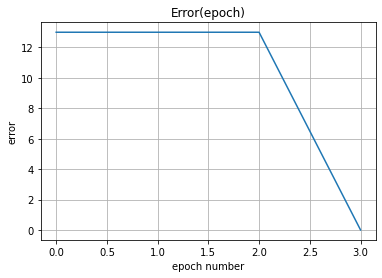

In [15]:
net = BinaryStepNet(3, C)       
L_iter = []
idxs = [1, 12]

for epoch in range(EPOCH_NUMBER):
    error_on_train = 0.
    print("\n\tEpoch ", epoch)
    for i in idxs:
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error_on_train += abs(delta)
        net.backward(delta, lr)
    Y_predicted = get_predict(net, X_test)
    error_on_test = np.sum(np.abs(loss(Y_predicted, Y)))
    L_iter.append(error_on_test)
    print("W = ", net.W)
    print("Y = ", Y_predicted)
    print("E = ", error_on_test)
    if (error_on_test == 0):
        break

print("\nfinal W = ", net.W)
fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')
plt.grid()
plt.show()

## Softsign

In [16]:
class SoftsignNet:
    
    def __init__(self, neurons_count, centers):
        self.neurons_count = neurons_count
        self.neuron = []
        for i in range(self.neurons_count):
            self.neuron.append(RadialBasisFunctionNeuron(centers[i]))
        self.W = np.zeros(shape=neurons_count)
        self.b = 0
    
    def forward(self, x, threshold=0.5):
        self.phi = []
        for i in range(self.neurons_count):
            self.phi.append(self.neuron[i].get_phi(x))
        self.phi = np.array(self.phi)
        self.net = np.dot(self.W, self.phi) + self.b
        self.softsign = 0.5 * (self.net / (1 + np.abs(self.net)) + 1)
        return int(self.softsign > threshold)
    
    def backward(self, delta, lr=0.3):
        self.dz = 0.5 / (1 + np.abs(self.softsign) ** 2)
        self.dW = np.dot(lr * delta * self.dz, self.phi)
        self.db = lr * delta * self.dz
        self.W = self.W + self.dW
        self.b = self.b + self.db

### Пробуем обучиться на всех данных


	Epoch  0
W =  [-0.05972155 -0.06028219 -0.10568028] b =  0.14184180389848786
Y_pred =  [0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1]
Y_true =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  7.0

	Epoch  1
W =  [-0.14289879 -0.14437253 -0.15987951] b =  0.15016789788755974
Y_pred =  [1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1]
Y_true =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  4.0

	Epoch  2
W =  [-0.14289879 -0.14437253 -0.15987951] b =  0.15016789788755974
Y_pred =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
Y_true =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  0.0


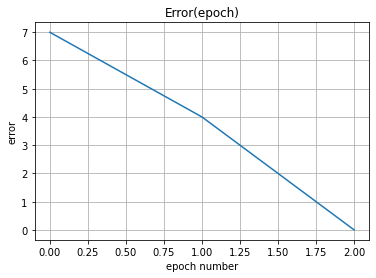

In [17]:
net = SoftsignNet(3, C)
L_iter = []
size_of_train = 16

for epoch in range(EPOCH_NUMBER):
    error = 0.
    print("\n\tEpoch ", epoch)
    Y_predicted = []
    for i in range(size_of_train):
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error += abs(delta)
        net.backward(delta, lr)
        Y_predicted.append(y_predicted)
    L_iter.append(error)
    print("W = ", net.W, 'b = ', net.b)
    print("Y_pred = ", np.array(Y_predicted))
    print("Y_true = ", Y)
    print("E = ", error)
    if (error == 0):
        break

fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')
plt.grid()
plt.show()

### Поиск наименьшей комбинации

In [18]:
for number_of_variables in range(15, 0, -1):
    combs = tuple(combinations(range(16), number_of_variables))
    for idxs in combs:
        net = SoftsignNet(3, C)      
        L_iter = []
        for epoch in range(BIG_EPOCH_NUMBER):
            error_on_train = 0.
            Y_predicted = []
            for i in idxs:
                x = [X1[i], X2[i], X3[i], X4[i]]
                y_true = Y[i]
                y_predicted = net.forward(x)
                delta = loss(y_true, y_predicted)
                error_on_train += abs(delta)
                net.backward(delta, lr)
                Y_predicted.append(y_predicted)
            error_on_test = np.sum(loss(get_predict(net, X_test), Y))
            L_iter.append(error_on_test)
            if (error_on_test == 0):
                break
                
        if L_iter[-1] == 0:
            print("Combination of size ", number_of_variables, " found. Indexes : ", idxs)
            break

Combination of size  15  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
Combination of size  14  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)
Combination of size  13  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
Combination of size  12  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
Combination of size  11  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Combination of size  10  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Combination of size  9  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 7, 8)
Combination of size  8  found. Indexes :  (0, 1, 2, 3, 4, 5, 6, 8)
Combination of size  7  found. Indexes :  (0, 1, 2, 3, 4, 5, 8)
Combination of size  6  found. Indexes :  (0, 1, 2, 3, 4, 8)
Combination of size  5  found. Indexes :  (0, 1, 2, 4, 8)
Combination of size  4  found. Indexes :  (0, 1, 4, 8)
Combination of size  3  found. Indexes :  (0, 4, 8)
Combination of size  2  found. Indexes :  (7, 12)


### Обучаемся на полученной наименьшей комбинации


	Epoch  0
W =  [-0.02581809 -0.03986045 -0.10835193]
Y =  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
E =  12

	Epoch  1
W =  [-0.0535903  -0.08169707 -0.22207567]
Y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
E =  13

	Epoch  2
W =  [-0.0372627  -0.07948737 -0.21606908]
Y =  [1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
E =  0

final W =  [-0.0372627  -0.07948737 -0.21606908]


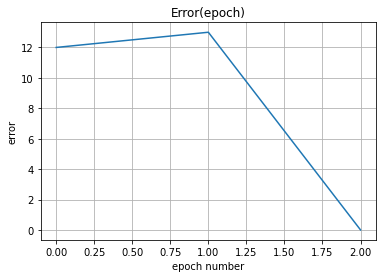

In [19]:
net = SoftsignNet(3, C)       
L_iter = []
idxs = [7, 12]

for epoch in range(BIG_EPOCH_NUMBER):
    error_on_train = 0.
    print("\n\tEpoch ", epoch)
    for i in idxs:
        x = [X1[i], X2[i], X3[i], X4[i]]
        y_true = Y[i]
        y_predicted = net.forward(x)
        delta = loss(y_true, y_predicted)
        error_on_train += abs(delta)
        net.backward(delta, lr)
    Y_predicted = get_predict(net, X_test)
    error_on_test = np.sum(np.abs(loss(Y_predicted, Y)))
    L_iter.append(error_on_test)
    print("W = ", net.W)
    print("Y = ", Y_predicted)
    print("E = ", error_on_test)
    if (error_on_test == 0):
        break

print("\nfinal W = ", net.W)
fig, ax = plt.subplots()
ax.plot(L_iter)
ax.set_xlabel('epoch number')
ax.set_ylabel('error')
ax.set_title('Error(epoch)')
plt.grid()
plt.show()